# 感知机算法
1. 感知机算法的实现
2. sklearn中感知机算法的使用

数据集：skleanr.datasets.iris

In [6]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

# Load Data

In [11]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['lable'] = iris.target
print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     lable  
0        0  
1

In [13]:
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'lable'] #rename
df.lable.value_counts()

2    50
1    50
0    50
Name: lable, dtype: int64

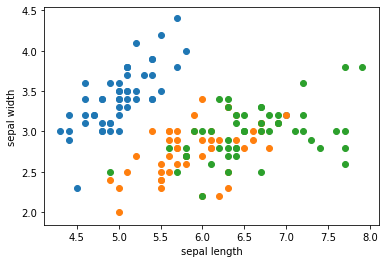

In [17]:
plt.scatter(df.loc[:50, 'sepal length'], df.loc[:50, 'sepal width'], label='0')
plt.scatter(df.loc[50:100, 'sepal length'], df.loc[50:100, 'sepal width'], label='1')
plt.scatter(df.loc[100:150, 'sepal length'], df.loc[100:150, 'sepal width'], label='2')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

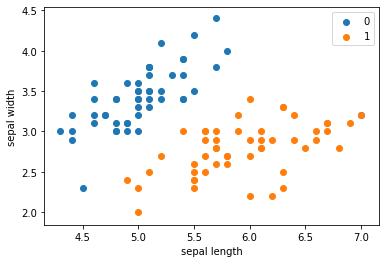

In [45]:
# using the data with label 0 and label 1
plt.scatter(df.loc[:50, 'sepal length'], df.loc[:50, 'sepal width'], label='0')
plt.scatter(df.loc[50:100, 'sepal length'], df.loc[50:100, 'sepal width'], label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()

data = np.array(df.iloc[:100, [0, 1, -1]])
X, y = data[:, :2], data[:, -1]
y = np.array([1 if label == 1 else -1 for label in y])

# Model

In [40]:
class Model:
    def __init__(self):
        self.w = np.ones(X[0].shape, dtype=np.float32)
        self.b = 0
        self.lr = 0.2
    def predict(self, x):
        y = np.dot(self.w, x) + self.b
        return y
    def learn(self, X_train, y_train):
        all_classified = False
        while not all_classified:
            wrong_classified_count = 0
            for i in range(len(X_train)):
                if y_train[i] * self.predict(X_train[i]) <= 0:
                    self.w += self.lr * y_train[i] * X_train[i]
                    self.b += self.lr * y_train[i]
                    wrong_classified_count += 1
            if wrong_classified_count == 0:
                all_classified = True
        return 'Perceptron Model Built'

In [41]:
Perceptron = Model()
Perceptron.learn(X, y)

'Perceptron Model Built'

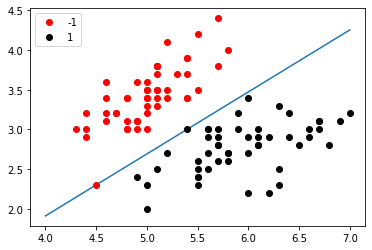

In [53]:
# plot the hyperplane
_x_points = np.linspace(4, 7, 10)
_y = -(Perceptron.w[0] * _x_points + Perceptron.b) / Perceptron.w[1]
plt.plot(_x_points, _y)

plt.plot(X[:50, 0], X[:50, 1], 'bo', color='red', label='-1')
plt.plot(X[50:100, 0], X[50:100, 1], 'bo', color='black', label='1')
plt.legend()
plt.show()

# sklearn model

In [58]:
import sklearn
from sklearn.linear_model import Perceptron
print(sklearn.__version__)

0.22.1


In [72]:
linear_classfier = Perceptron(fit_intercept=True,
                             max_iter=1000,
                             shuffle=True)
linear_classfier.fit(X, y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

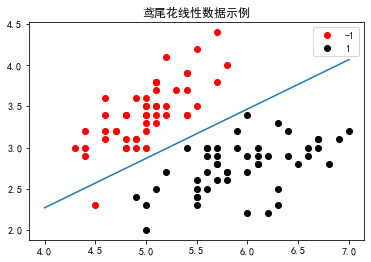

In [73]:
# 中文标题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.title('鸢尾花线性数据示例')


_x_points = np.linspace(4, 7, 10)
_y = -(linear_classfier.coef_[0][0] * _x_points + linear_classfier.intercept_[0]) / linear_classfier.coef_[0][1]
plt.plot(_x_points, _y)

plt.plot(X[:50, 0], X[:50, 1], 'bo', color='red', label='-1')
plt.plot(X[50:100, 0], X[50:100, 1], 'bo', color='black', label='1')
plt.legend()
plt.show() # There is one point classfied into wrong side.

**注意 !**

在上图中，有一个位于左下角的蓝点没有被正确分类，这是因为 SKlearn 的 Perceptron 实例中有一个`tol`参数。

`tol` 参数规定了如果本次迭代的损失和上次迭代的损失之差小于一个特定值时，停止迭代。所以我们需要设置 `tol=None` 使之可以继续迭代：

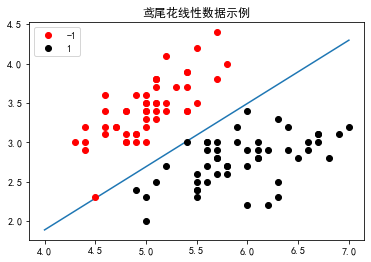

In [75]:
linear_classfier = Perceptron(fit_intercept=True, 
                              max_iter=1000,
                              tol=None,
                              shuffle=True)
linear_classfier.fit(X, y)


# 中文标题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.title('鸢尾花线性数据示例')


_x_points = np.linspace(4, 7, 10)
_y = -(linear_classfier.coef_[0][0] * _x_points + linear_classfier.intercept_[0]) / linear_classfier.coef_[0][1]
plt.plot(_x_points, _y)

plt.plot(X[:50, 0], X[:50, 1], 'bo', color='red', label='-1')
plt.plot(X[50:100, 0], X[50:100, 1], 'bo', color='black', label='1')
plt.legend()
plt.show()

参考代码：https://github.com/fengdu78/lihang-code